In [ ]:
import nltk


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
import sys
from time import time

import pandas as pd
import numpy as np

In [ ]:
categories = ['talk.religion.misc','comp.graphics','sci.space',]

df = fetch_20newsgroups(subset='all', categories = categories, shuffle=False,remove=('headers','footers','quotes'))

In [ ]:
labels = df.target
true_k = len(np.unique(labels)) ##should be 3
print(true_k
      )

3


In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
##Lemmatization####

In [ ]:
lemmatizer = WordNetLemmatizer()
for i in range(len(df.data)):
  word_list = word_tokenize(df.data[i])
  lemmatized_doc = ""
  for word in word_list:
    lemmatized_doc += lemmatizer.lemmatize(word) + " " + lemmatizer.lemmatize(word)
  df.data[i] = lemmatized_doc

In [ ]:
print(df.data[0])

I Ithink thinkI Ican can. .Largely Largelya aa aresult resultof ofeffort effortby bypeople peoplereading readingthis thisgroup groupwriting writingletter letterand andmaking makingphone phonecall callthe thefollowing followingha hahappened happened: :1 1. .NASA NASAreprogrammed reprogrammedfund fundto tokeep keepNASP NASPalive alivein in1991 1991. .2 2. .Efforts Effortsto tokill killDC-X DC-Xand andthe theSSRT SSRTprogam progamwhere wheretwice twicetwarted twarted( (Feb. Feb.and andJune Juneof oflast lastyear year) ). .3 3. .Gouldin Gouldinkept kepthis hisjob jobin inspite spiteof ofheavy heavylobbying lobbyingagainst againsthim him. .This Thismay maynot notbe bewhat whatMark Markwa wathinking thinkingof ofbut butit itshow showthat thatthe thereader readerof ofsci.space sci.spaceDO DOhave havepower powerand andinfluence influence. .Allen Allen


In [ ]:
vectorizer = TfidfVectorizer(strip_accents='unicode',stop_words='english',min_df=2)
X = vectorizer.fit_transform(df.data)

In [ ]:
print(X.shape)

(2588, 58771)


In [ ]:
##Clustering Using Standard k-means
km = KMeans(n_clusters=true_k,init='k-means++',max_iter=100)
t0 =time()
km.fit(X)
print("done in %0.3fs" %(time()-t0))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


done in 3.696s


In [ ]:
#Commented Out IPython to Ensure Python Compatibility.
print("Homogeneity: %0.3f" %metrics.homogeneity_score(labels,km.labels_))
#low Value indicates low homogeneity
#A Clustering Result Satisfies Completeness if all the Data Points that are members of a Given class are elements of the same cluster
print("Completeness: %03f" % metrics.v_measure_score(labels,km.labels_))#print("V-measure: %0.3f" % metrics.v_measure_score(labels,km.labels_)
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(labels,km.labels_))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X,km.labels_,sample_size=1000))

Homogeneity: 0.145
Completeness: 0.180887
Adjusted Rand-Index: 0.087
Silhouette Coefficient: 0.009


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
import os

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV, SelectFromModel, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [ ]:
df_Stock = pd.read_csv('/AAPL.csv',  index_col=0)
#index_col: to set which columns to be used as the index of the dataframe.  default=None,
# pandas will add a new column start from 0 to specify the index column. It can be set as a column name or column index, which will be used as the index column.
print(df_Stock.columns)
df_Stock = df_Stock.rename(columns={'Close(t)':'Close'}) #rename the old name of the column 'clost(t)' to newname 'close'


Index(['Open', 'High', 'Low', 'Close(t)', 'Volume', 'SD20', 'Upper_Band',
       'Lower_Band', 'S_Close(t-1)', 'S_Close(t-2)', 'S_Close(t-3)',
       'S_Close(t-5)', 'S_Open(t-1)', 'MA5', 'MA10', 'MA20', 'MA50', 'MA200',
       'EMA10', 'EMA20', 'EMA50', 'EMA100', 'EMA200', 'MACD', 'MACD_EMA',
       'ATR', 'ADX', 'CCI', 'ROC', 'RSI', 'William%R', 'SO%K', 'STD5',
       'ForceIndex1', 'ForceIndex20', 'Date_col', 'Day', 'DayofWeek',
       'DayofYear', 'Week', 'Is_month_end', 'Is_month_start', 'Is_quarter_end',
       'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Is_leap_year',
       'Year', 'Month', 'QQQ_Close', 'QQQ(t-1)', 'QQQ(t-2)', 'QQQ(t-5)',
       'QQQ_MA10', 'QQQ_MA20', 'QQQ_MA50', 'SnP_Close', 'SnP(t-1))',
       'SnP(t-5)', 'DJIA_Close', 'DJIA(t-1))', 'DJIA(t-5)', 'Close_forcast'],
      dtype='object')


In [ ]:
print(df_Stock.shape)
print(df_Stock.columns)

(2929, 63)
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'SD20', 'Upper_Band',
       'Lower_Band', 'S_Close(t-1)', 'S_Close(t-2)', 'S_Close(t-3)',
       'S_Close(t-5)', 'S_Open(t-1)', 'MA5', 'MA10', 'MA20', 'MA50', 'MA200',
       'EMA10', 'EMA20', 'EMA50', 'EMA100', 'EMA200', 'MACD', 'MACD_EMA',
       'ATR', 'ADX', 'CCI', 'ROC', 'RSI', 'William%R', 'SO%K', 'STD5',
       'ForceIndex1', 'ForceIndex20', 'Date_col', 'Day', 'DayofWeek',
       'DayofYear', 'Week', 'Is_month_end', 'Is_month_start', 'Is_quarter_end',
       'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Is_leap_year',
       'Year', 'Month', 'QQQ_Close', 'QQQ(t-1)', 'QQQ(t-2)', 'QQQ(t-5)',
       'QQQ_MA10', 'QQQ_MA20', 'QQQ_MA50', 'SnP_Close', 'SnP(t-1))',
       'SnP(t-5)', 'DJIA_Close', 'DJIA(t-1))', 'DJIA(t-5)', 'Close_forcast'],
      dtype='object')


In [ ]:
df_Stock.head()

,Open,High,Low,Close,Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),S_Close(t-2),...,QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast
Date,,,,,,,,,,,,,,,,,,,,,
2005-10-17,6.66,6.69,6.50,6.60,154208600,0.169237,6.827473,6.150527,6.67,6.63,...,33.692,33.9970,34.2690,1190.10,1186.57,1187.33,10348.10,10287.34,10238.76,6.45
2005-10-18,6.57,6.66,6.44,6.45,152397000,0.168339,6.819677,6.146323,6.60,6.67,...,33.570,33.9525,34.2466,1178.14,1190.10,1184.87,10285.26,10348.10,10253.17,6.78
2005-10-19,6.43,6.78,6.32,6.78,252170800,0.180306,6.861112,6.139888,6.45,6.60,...,33.562,33.9600,34.2330,1195.76,1178.14,1177.68,10414.13,10285.26,10216.91,6.93
2005-10-20,6.72,6.97,6.71,6.93,339440500,0.202674,6.931847,6.121153,6.78,6.45,...,33.567,33.9455,34.2190,1177.80,1195.76,1176.84,10281.10,10414.13,10216.59,6.87
2005-10-21,7.02,7.03,6.83,6.87,199181500,0.216680,6.974860,6.108140,6.93,6.78,...,33.586,33.9365,34.2034,1179.59,1177.80,1186.57,10215.22,10281.10,10287.34,7.01


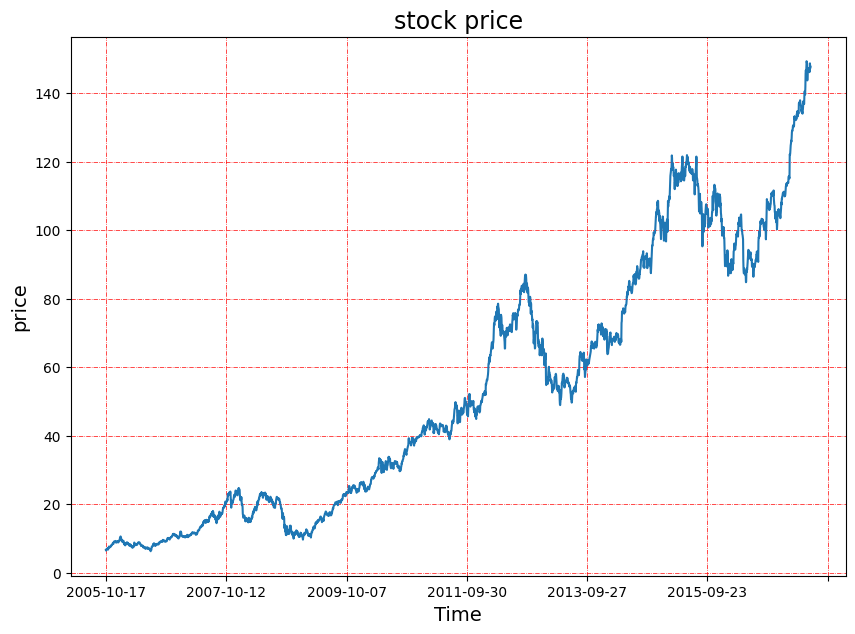

In [ ]:
df_Stock['Close'].plot(figsize=(10,7))
plt.title("stock price",fontsize=17)
plt.ylabel('price',fontsize=14)
plt.xlabel('Time',fontsize=14)
plt.grid(which = "major",color='r',linestyle='-.',linewidth=0.5)
plt.show()

df_show = df_Stock.drop(columns='Date_col')

In [ ]:
def create_train_test_set(df_Stock):
  features = df_Stock.drop(columns=['Close_forcast'],axis=1)
  target = df_Stock['Close_forcast']
  no_samples = df_Stock.shape[0]
  print('Data size is' ,str(no_samples))

  train_split = int(no_samples *0.88)
  print('Training Set length -',str(train_split))

  val_split = train_split +int(no_samples *0.1)
  print('Validation Set length - ',str(int(no_samples *0.1)))

  print('Test Set length -',str(int(no_samples *0.2)))

  X_train, X_val, X_test = features[:train_split], features[train_split:val_split], features[val_split:]
  Y_train, Y_val, Y_test = target[:train_split], target[train_split:val_split], target[val_split:]

  #print shape of samples
  print(X_train.shape, X_val.shape, X_test.shape)
  print(Y_train.shape, Y_val.shape, Y_test.shape)

  return X_train, X_val, X_test, Y_train, Y_val, Y_test

X_train, X_val, X_test, Y_train, Y_val, Y_test = create_train_test_set(df_Stock)




Data size is 2929
Training Set length - 2577
Validation Set length -  292
Test Set length - 585
(2577, 62) (292, 62) (60, 62)
(2577,) (292,) (60,)


In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)
print('LR Coefficients: \n', lr.coef_)
print('LR Intercept: \n', lr.intercept_)
print("Performance (R^2): ", lr.score(X_train, Y_train))

def get_mape(y_true, y_pred):
    #    Compute mean absolute percentage error (MAPE)
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

Y_train_pred = lr.predict(X_train)
Y_val_pred = lr.predict(X_val)
Y_test_pred = lr.predict(X_test)

print("Training R-squared: ",round(metrics.r2_score(Y_train,Y_train_pred),2))
print('Training MAPE:', round(get_mape(Y_train,Y_train_pred), 2))
print('Training Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2))
print("Training RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_train,Y_train_pred)),2))
print(' ')

print("Validation R-squared: ",round(metrics.r2_score(Y_val,Y_val_pred),2))
print('Validation MAPE:', round(get_mape(Y_val,Y_val_pred), 2))
print('Validation Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2))
print("Validation RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_val,Y_val_pred)),2))

print(' ')

print("Test R-squared: ",round(metrics.r2_score(Y_test,Y_test_pred),2))
print('Test MAPE:', round(get_mape(Y_test,Y_test_pred), 2))
print('Test Mean Squared Error:', round(metrics.mean_squared_error(Y_test,Y_test_pred), 2))
print("Test RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_test,Y_test_pred)),2))
print("Test MAE: ",round(metrics.mean_absolute_error(Y_test,Y_test_pred),2))


ValueError: could not convert string to float: '2005-10-17'

In [31]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA,IncrementalPCA
test_data = pd.read_csv("test.csv")
train_data = pd.read_csv("train.csv")




FileNotFoundError: [Errno 2] No such file or directory: 'test.csv'